In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/world-coordinates/world_coordinates.csv


In [18]:
data = pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
Sno               700 non-null int64
Date              700 non-null object
Province/State    536 non-null object
Country           700 non-null object
Last Update       700 non-null object
Confirmed         700 non-null float64
Deaths            700 non-null float64
Recovered         700 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 43.9+ KB


In [20]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'], axis=1, inplace=True)
#data.set_index('Last Update', inplace=True)
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [21]:
countries = data['Country'].unique().tolist()
province_state = data['Province/State'].unique().tolist()

print("\n Paises afetados: ", countries)
print("\n Provincias/Estados afetados: ",province_state)

print('\n Total de paises afetados: ', len(countries))
print("\n Total de provincias afetadas pelo virus: ", len(province_state))

#

data['Country'].replace({'Mainland China':'China'}, inplace=True)
countries = data['Country'].unique().tolist()
#print('\n',countries)
#print("\nTotal countries affected by virus: ",len(countries))


 Paises afetados:  ['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

 Provincias/Estados afetados:  ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang', nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario', 'New South Wales', 'Victoria', 'Bavaria', 'British Columbia', 'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA', 'Los Angeles, CA'

In [22]:
d = data['Date'][-1:].astype('str')
ano = int(d.values[0].split('-')[0])
mes = int(d.values[0].split('-')[1])
dia = int(d.values[0].split('-')[2].split()[0])

from datetime import date

ultimos = data[data['Date'] > pd.Timestamp(date(ano,mes,dia))]
ultimos.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
631,2020-02-03 21:40:00,Hubei,China,2020-04-02 01:23:00,13522.0,414.0,396.0
632,2020-02-03 21:40:00,Zhejiang,China,2020-04-02 01:43:00,829.0,0.0,48.0
633,2020-02-03 21:40:00,Guangdong,China,2020-04-02 01:43:00,797.0,0.0,21.0
634,2020-02-03 21:40:00,Henan,China,2020-04-02 01:23:00,675.0,2.0,20.0
635,2020-02-03 21:40:00,Hunan,China,2020-04-02 01:43:00,593.0,0.0,22.0


In [23]:
paises_com_casos = len(ultimos['Country'].value_counts())

casos = pd.DataFrame(ultimos.groupby('Country')['Confirmed'].sum())
casos['Country'] = casos.index
casos.index = np.arange(1,paises_com_casos + 1)

casos_globais = casos[['Country','Confirmed']]
casos_globais

,Country,Confirmed
1,Australia,12.0
2,Cambodia,1.0
3,Canada,4.0
4,China,20400.0
5,Finland,1.0
6,France,6.0
7,Germany,12.0
8,Hong Kong,15.0
9,India,3.0
10,Italy,2.0


In [24]:
coordenadas = pd.read_csv('../input/world-coordinates/world_coordinates.csv')

info_coordenadas = pd.merge(coordenadas, casos_globais, on='Country')
info_coordenadas.head()

,Code,Country,latitude,longitude,Confirmed
0,AE,United Arab Emirates,23.424076,53.847818,5.0
1,AU,Australia,-25.274398,133.775136,12.0
2,CA,Canada,56.130366,-106.346771,4.0
3,CN,China,35.861660,104.195397,20400.0
4,DE,Germany,51.165691,10.451526,12.0


In [34]:
import folium

world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(info_coordenadas['latitude'], info_coordenadas['longitude'], info_coordenadas['Confirmed'], info_coordenadas['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Pais</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Casos Confirmados</strong>: ' + str(int(value)) + '<br>'), 
                        color='orange',
                        fill_color='orange',
                        fill_opacity=0.7).add_to(world_map)
world_map

In [43]:
print('Casos confirmados no mundo: ', int(ultimos['Confirmed'].sum()))
print('Número de mortes confirmadas: ', int(ultimos['Deaths'].sum()))
print('Número de pacientes curados: ', int(ultimos['Recovered'].sum()))

Casos confirmados no mundo:  20588
Número de mortes confirmadas:  426
Número de pacientes curados:  644


In [47]:
ultimos.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country   Province/State                                
Australia New South Wales         4.0     0.0        2.0
          Queensland              2.0     0.0        0.0
          South Australia         2.0     0.0        0.0
          Victoria                4.0     0.0        0.0
Canada    British Columbia        1.0     0.0        0.0
          London, ON              1.0     0.0        0.0
          Toronto, ON             2.0     0.0        0.0
China     Anhui                 480.0     0.0       14.0
          Beijing               212.0     1.0       12.0
          Chongqing             337.0     2.0        9.0
          Fujian                179.0     0.0        1.0
          Gansu                  55.0     0.0        3.0
          Guangdong             797.0     0.0       21.0
          Guangxi               139.0     0.0        7.0
          Guizhou                56.0     0.0        2.0
          Hainan                 79.0     1.0        4.0
          Hebei                 126.0     1.0        3.0
          Heilongjiang          155.0     2.0        2.0
          Henan                 675.0     2.0       20.0
          Hubei               13522.0   414.0      396.0
          Hunan                 593.0     0.0       22.0
          Inner Mongolia         34.0     0.0        1.0
          Jiangsu               308.0     0.0        8.0
          Jiangxi               476.0     0.0       19.0
          Jilin                  42.0     0.0        1.0
          Liaoning               74.0     0.0        1.0
          Ningxia                34.0     0.0        1.0
          Qinghai                15.0     0.0        0.0
          Shaanxi               142.0     0.0        1.0
          Shandong              270.0     0.0        7.0
          Shanghai              208.0     1.0       10.0
          Shanxi                 74.0     0.0        2.0
          Sichuan               282.0     1.0       14.0
          Tianjin                60.0     0.0        1.0
          Tibet                   1.0     0.0        0.0
          Xinjiang               29.0     0.0        0.0
          Yunnan                117.0     0.0        5.0
          Zhejiang              829.0     0.0       48.0
Hong Kong Hong Kong              15.0     0.0        0.0
Macau     Macau                   8.0     0.0        0.0
Taiwan    Taiwan                 10.0     0.0        0.0
US        Boston, MA              1.0     0.0        0.0
          Chicago, IL             2.0     0.0        0.0
          Los Angeles, CA         1.0     0.0        0.0
          Orange, CA              1.0     0.0        0.0
          San Benito, CA          2.0     0.0        0.0
          Santa Clara, CA         2.0     0.0        0.0
          Seattle, WA             1.0     0.0        0.0
          Tempe, AZ               1.0     0.0        0.0

In [50]:
ultimos.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
China          425.0
Philippines      1.0
Vietnam          0.0
Malaysia         0.0
Cambodia         0.0
Name: Deaths, dtype: float64

NameError: name 'sns' is not defined

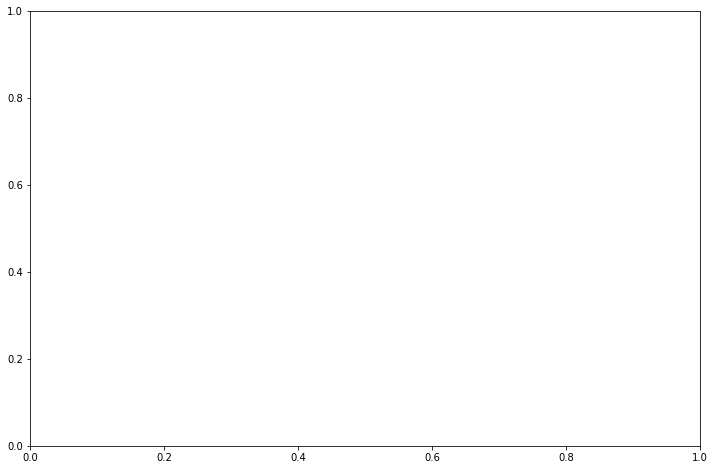

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

china = ultimos[ultimos['Country']=='China']

f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=china[1:],
            label="Confirmados", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=china[1:],
            label="Curados", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)